In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

# Importing the dataset

In [7]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


# Implementing Upper Confidence Bound

In [8]:
def UCB(N,d):
    ads_selected = []
    number_of_selections = [0] * d
    sums_of_reward = [0] * d
    total_reward = 0

    for n in range(0,N):
        ad = 0
        max_upper_bound = 0

        for i in range(0,d):
            if(number_of_selections[i] > 0):
                
                avg_reward = sums_of_reward[i]/number_of_selections[i]
                delta_i = (1.5 * math.log(n+1) / number_of_selections[i])**0.5

                upper_bound = avg_reward + delta_i

            else:
                upper_bound = 1e400

            if(upper_bound > max_upper_bound):
                max_upper_bound = upper_bound
                ad = i
        
        ads_selected.append(ad)
        number_of_selections[ad] += 1

        reward = dataset.values[n,ad]
        sums_of_reward[ad] += reward
        total_reward += reward


    plt.hist(ads_selected)
    plt.title("Histogram of ads selected")
    plt.xlabel("Ads")
    plt.ylabel("Number of times the ad was selected")
    plt.show()






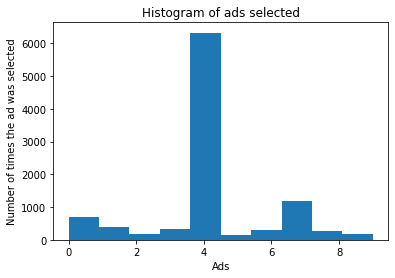

In [9]:
UCB(10000,10)

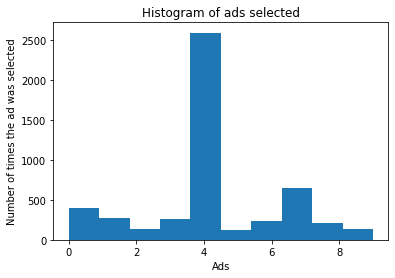

In [10]:
UCB(5000,10)

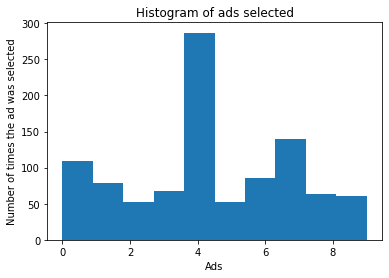

In [11]:
UCB(1000,10)

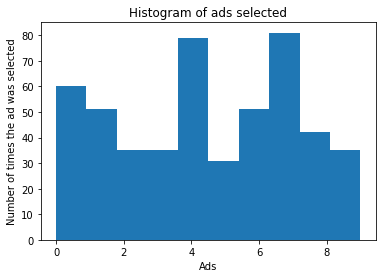

In [12]:
UCB(500,10)

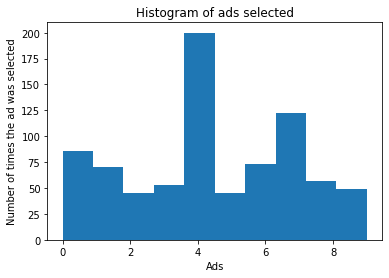

In [13]:
UCB(800,10)

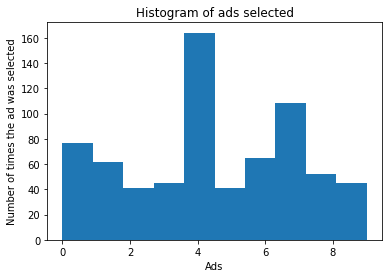

In [14]:
UCB(700,10)

# Implementing Thompson Sampling

In [15]:
def Thompson_sampling(N,d):
    ads_selected = []
    numbers_of_rewards_1 = [0] * d
    numbers_of_rewards_0 = [0] * d
    total_reward = 0
    for n in range(0, N):
        ad = 0
        max_random = 0
        for i in range(0, d):
            random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
            if (random_beta > max_random):
                max_random = random_beta
                ad = i
        ads_selected.append(ad)
        reward = dataset.values[n, ad]
        if reward == 1:
            numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
        else:
            numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
        total_reward = total_reward + reward

    plt.hist(ads_selected)
    plt.title('Histogram of ads selections')
    plt.xlabel('Ads')
    plt.ylabel('Number of times each ad was selected')
    plt.show()

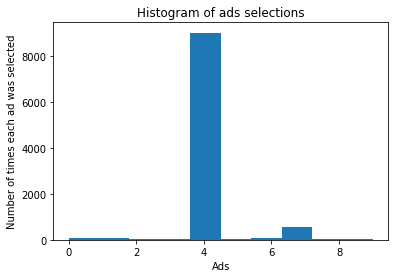

In [16]:
Thompson_sampling(10000,10)

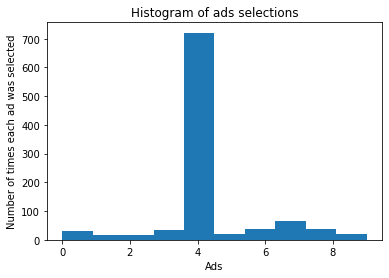

In [17]:
Thompson_sampling(1000,10)

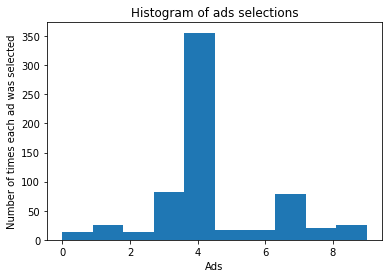

In [18]:
Thompson_sampling(650,10)

### Thus While using UCB(Upper Confidence Bound) we need around 700 different Ads to know the best ad, while through Thompson Sampling, we need 650 Ads to know the best ad.